# UHS1—4 Imputation
__Author__: Jesse Marks <br>

**GitHub Issue:** [Issue #97](https://github.com/RTIInternational/bioinformatics/issues/97)

This document logs the steps taken to perform pre-imputation procedures on the UHS datasets—UHS1, UHS2, UHS3v–2, UHS3v–3, and UHS4. The starting point for this analysis is after quality control of observed genotypes. The quality controlled genotypes are oriented on the GRCh37 plus strand. We will first verify the ancestry groups by performing a STRUCTURE analysis of the combined data.

## Software and tools
The software and tools used for porcessing these data are
* [Michigan Imputation Server](https://imputationserver.sph.umich.edu/index.html) (MIS)
* [Amazon Web Services (AWS) - Cloud Computing Services](https://aws.amazon.com/)
    * Linux AMI
* [PLINK v1.90 beta 4.10](https://www.cog-genomics.org/plink/)
* [bgzip](http://www.htslib.org/doc/tabix.html)
* [BCF Tools](http://www.htslib.org/doc/bcftools.html)
* Windows 10 with [Cygwin](https://cygwin.com/) installed
* GNU bash version 4.2.46

## Data retrieval and organization
PLINK binary filesets were obtained from AWS S3 storage. Nathan Gaddis detail the whereabouts of the UHS genotype data in [this post from GitHub Issue #117](https://github.com/RTIInternational/bioinformatics/issues/117#issuecomment-469845859) and [this post from GitHub Issue #97](https://github.com/RTIInternational/bioinformatics/issues/97#issuecomment-488712833).

* UHS1: `s3://rti-midas-data/studies/hiv/observed/final/uhs1.ea*`
* UHS2: `s3://rti-midas-data/studies/hiv/observed/final/uhs2{ea,aa}*`
* UHS3_v–2: `s3://rti-midas-data/studies/hiv/observed/final/uhs3.{ea,aa}.V1-2*`
* UHS3_v–3: `s3://rti-midas-data/studies/hiv/observed/final/uhs3.{ea,aa}.V1-3*`
* UHS4: `s3://rti-midas-data/studies/uhs4/observed/genotypes/final/uhs4.merged2.{ea,aa}.*`

**Note:** that we are not using the HA data for UHS4

##  Statistics Breakdown 
This table includes the initial number of variants in each study as well as the final number of variants in the intersection set. The `Variants Post-Filtering` is in referral to the filtering steps (1) remove discordant alleles & (2) removal of monomorphic variants.

### EA
| Data Set      | Initial Variants | Variants Post-Filtering  | Intersection     |
|---------------|------------------|--------------------------|------------------|
| UHS1          |  808,822         |                          | NA               |
| UHS2          |  1,820,881       |                          | NA               |
| UHS3_v1-2     |  1,924,758       |                          | NA               |
| UHS3_v1-3     |  1,868,610       |                          | NA               |
| UHS4          |  2,073,618       |                          | NA               |

### AA
| Data Set      | Initial Variants | Variants Post-Filtering  | Intersection     |
|---------------|------------------|--------------------------|------------------|
| UHS1          | 805,863          |                          | NA               |
| UHS2          | 1,395,852        |                          | NA               |
| UHS3_v1-2     | 1,845,925        |                          | NA               |
| UHS3_v1-3     | 1,806,719        |                          | NA               |
| UHS4          | 1,878,335        |                          | NA               |


```
ww */*fam
  2016 uhs1/uhs1.aa.fam
  1142 uhs1/uhs1.ea.fam
   767 uhs2/uhs2.aa.fam
   828 uhs2/uhs2.ea.fam
    84 uhs3_v1-2/uhs3.aa.V1-2.fam
    33 uhs3_v1-2/uhs3.ea.V1-2.fam
    94 uhs3_v1-3/uhs3.aa.V1-3.fam
    44 uhs3_v1-3/uhs3.ea.V1-3.fam
  1072 uhs4/uhs4.merged2.aa.fam
   989 uhs4/uhs4.merged2.ea.fam
  7069 total
```

# Create Directory Structure & Download Data
The following section needs to be modified each time to reflect where the data is stored!

In [ ]:
### EC2 command line (bash) ###

# Modify variables below
######################################################################
base_dir=/shared/jmarks/hiv/uhs1-4
#genD=/shared/jmarks/heroin/uhs4/genotype/observed/final/004

base_name="chr_all" # chr23 or chr_all
chr_list={1..23} # or {1..22} 
ancestry_list="ea aa" # space delimited Ex. "ea aa ha"
study_list="uhs1 uhs2 uhs3_v1-2 uhs3_v1-3 uhs4" # space delimited, lowercase
######################################################################

mkdir ${base_dir}/processing/{intersect,1000g,impute_prep}
for study in ${study_list};do
    for ancestry in ${ancestry_list};do
        mkdir -p ${base_dir}/processing/${study}
        mkdir -p ${base_dir}/data/${study}/genotype/observed/${ancestry}
    done
done

## download genotype (with AWS CLI tools) to respective directories ##
# UHS1
cd /shared/jmarks/hiv/uhs1-4/uhs1
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs1.ea.bed . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs1.ea.bim . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs1.ea.fam . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs1.aa.bed . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs1.aa.bim . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs1.aa.fam . 

# UHS2
cd /shared/jmarks/hiv/uhs1-4/uhs2
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs2.ea.bed . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs2.ea.bim . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs2.ea.fam . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs2.aa.bed . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs2.aa.bim . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs2.aa.fam . 

# UHS3_v1-2
cd /shared/jmarks/hiv/uhs1-4/uhs3_v1-2
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs3.ea.V1-2.bed . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs3.ea.V1-2.bim . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs3.ea.V1-2.fam . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs3.aa.V1-2.bed . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs3.aa.V1-2.bim . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs3.aa.V1-2.fam . 

# UHS3_v1-2
cd /shared/jmarks/hiv/uhs1-4/uhs3_v1-3
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs3.ea.V1-3.bed . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs3.ea.V1-3.bim . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs3.ea.V1-3.fam . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs3.aa.V1-3.bed . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs3.aa.V1-3.bim . 
aws s3 cp s3://rti-midas-data/studies/hiv/observed/final/uhs3.aa.V1-3.fam . 

# UHS4
cd /shared/jmarks/hiv/uhs1-4/uhs4
aws s3 cp s3://rti-midas-data/studies/uhs4/observed/genotypes/final/uhs4.merged2.ea.bed . 
aws s3 cp s3://rti-midas-data/studies/uhs4/observed/genotypes/final/uhs4.merged2.ea.bim . 
aws s3 cp s3://rti-midas-data/studies/uhs4/observed/genotypes/final/uhs4.merged2.ea.fam . 
aws s3 cp s3://rti-midas-data/studies/uhs4/observed/genotypes/final/uhs4.merged2.aa.bed . 
aws s3 cp s3://rti-midas-data/studies/uhs4/observed/genotypes/final/uhs4.merged2.aa.bim . 
aws s3 cp s3://rti-midas-data/studies/uhs4/observed/genotypes/final/uhs4.merged2.aa.fam . 

# STRUCTURE analysis
Perform a STRUCTURE analysis of all combined UHS data. Extract a 10K SNP subset from the intersection of all of the studies and the 

## SNP Intersection

In [ ]:
## STRUCTURE ##
mkdir ${base_dir}/structure

# Convert SNPs from 1000G_p3 ids to rsIDs
for study in {uhs1,uhs2,uhs3_v1-2,uhs3_v1-3,uhs4};do
    for ancestry in {ea,aa};do
        perl -lane 'my $rsid = $F[1]; 
            my @rsid_array = split /:/, $rsid;
            $F[1]= @rsid_array[0];
            print join("\t", @F);' \
            ${base_dir}/$study/*${ancestry}*bim > ${base_dir}/$study/$study.$ancestry.rsid.bim
    done
done &

# Create new plink file set
for study in {uhs1,uhs2,uhs3_v1-2,uhs3_v1-3,uhs4};do
    for ancestry in {ea,aa};do
      /shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
          --bed $base_dir/$study/*${ancestry}*bed \
          --bim $base_dir/$study/$study.$ancestry.rsid.bim \
          --fam $base_dir/$study/*${ancestry}*fam \
          --make-bed \
          --out $base_dir/$study/$study.$ancestry.rsid
    done
done

# Get lists of non-A/T and non-C/G SNPs
for study in {uhs1,uhs2,uhs3_v1-2,uhs3_v1-3,uhs4};do
    for ancestry in {ea,aa};do
        perl -lane 'if (($F[4] eq "A" && $F[5] ne "T") || ($F[4] eq "T" && $F[5] ne "A") || ($F[4] eq "C" && $F[5] ne "G") || ($F[4] eq "G" && $F[5] ne "C")) { print $F[1]; }' \
            ${base_dir}/$study/$study.${ancestry}.rsid.bim | \
            sort -u | \
            grep "rs" > ${base_dir}/structure/${study}.$ancestry.no_at_cg_snps.txt
    done
done

## Get rsID overlap between study data ancestry groups
sort uhs* | uniq -dc | awk '$1==10 {print $2}' > ${base_dir}/structure/uhs_overlap_no_at_cg_snps.txt &


# Get list of variants from 1000G
mkdir $base_dir/structure/1000g_data
/shared/bioinformatics/software/scripts/qsub_job.sh \
    --job_name merge_1000g_snps \
    --script_prefix ${base_dir}/structure/1000g_data/merge_1000g_snps \
    --mem 3 \
    --priority 0 \
    --program "cut -f2,2 /shared/data/ref_panels/1000G/2013.05/plink/ALL.chr{1..22}.bim | \
        grep \"rs\" | \
        sort -u > ${base_dir}/structure/1000g_data/1000g_phase3_snps.txt"

# Get overlap between uhs and YRI+CHB+CEU
comm -12 ${base_dir}/structure/uhs_overlap_no_at_cg_snps.txt \
    $base_dir/structure/1000g_data/1000g_phase3_snps.txt > \
    ${base_dir}/structure/uhs.1000g.shared.snps.txt
"""304966 uhs_overlap_no_at_cg_snps.txt"""

# Select 10K random SNPs
perl -ne '$variant = $_; $variant =~ s/_.+//g; print rand()." ".$variant' \
    ${base_dir}/structure/uhs.1000g.shared.snps.txt | \
    sort | head -10000 | cut -d' ' -f2- > \
    ${base_dir}/structure/10K_random_snps

# Extract the 10K random SNPs from UHS
for study in {uhs1,uhs2,uhs3_v1-2,uhs3_v1-3,uhs4}; do
    for ancestry in {aa,ea}; do
      /shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
        --bfile $base_dir/$study/$study.${ancestry}.rsid \
        --extract $base_dir/structure/10K_random_snps \
        --make-bed \
        --out $base_dir/structure/$study.$ancestry.10K_random_snps
    done
done


for pop in {AFR,EAS,EUR}; do
    mkdir ${base_dir}/structure/1000g_data/${pop}
done

# Get subject IDs by ancestry
awk 'BEGIN { FS="\t"; OFS="\t" } { if($7=="African"){print $1,$1} }' /shared/data/ref_panels/1000G/2013.05/igsr_samples.tsv \
    > ${base_dir}/structure/1000g_data/AFR/AFR_subject_ids.txt
awk 'BEGIN { FS="\t"; OFS="\t" } { if($7=="East Asian"){print $1,$1} }' /shared/data/ref_panels/1000G/2013.05/igsr_samples.tsv \
    > ${base_dir}/structure/1000g_data/EAS/EAS_subject_ids.txt
awk 'BEGIN { FS="\t"; OFS="\t" } { if($7=="European"){print $1,$1} }' /shared/data/ref_panels/1000G/2013.05/igsr_samples.tsv \
    > ${base_dir}/structure/1000g_data/EUR/EUR_subject_ids.txt


# Make new binary filesets for each 1000G group
# only keeping the data from individuals which are from 1 of the three super populations
for pop in {AFR,EAS,EUR}; do
    for chr in {1..22}; do
        /shared/bioinformatics/software/scripts/qsub_job.sh \
            --job_name ${pop}_${chr}_filter \
            --script_prefix ${base_dir}/structure/1000g_data/${pop}/ancestry_partition_chr${chr} \
            --mem 15.5 \
            --priority 0 \
            --program /shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink  \
                --noweb \
                --memory 10000 \
                --bfile /shared/data/ref_panels/1000G/2013.05/plink/ALL.chr${chr} \
                --keep ${base_dir}/structure/1000g_data/${pop}/${pop}_subject_ids.txt \
                --extract ${base_dir}/structure/10K_random_snps \
                --make-bed \
                --out ${base_dir}/structure/1000g_data/${pop}/${pop}_chr${chr}_10K_snp_random_sample
    done
done


# Create merge lists and merge autosomes for each 1000G population
data_dir=$base_dir/structure/1000g_data
for pop in {AFR,EAS,EUR}; do
    echo "${data_dir}/${pop}/${pop}_chr1_10K_snp_random_sample" > ${data_dir}/${pop}/${pop}_autosome_merge_list.txt
    for chr in {2..22}; do
        echo "${data_dir}/${pop}/${pop}_chr${chr}_10K_snp_random_sample" \
        >> ${data_dir}/${pop}/${pop}_autosome_merge_list.txt
    done
done

for pop in {AFR,EAS,EUR}; do
    /shared/bioinformatics/software/scripts/qsub_job.sh \
        --job_name ${pop}_merge_plink_filesets \
        --script_prefix $base_dir/structure/1000g_data/${pop}/merge_plink_filesets \
        --mem 4 \
        --priority 0 \
        --program /shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
            --noweb \
            --memory 4000 \
            --merge-list $base_dir/structure/1000g_data/${pop}/${pop}_autosome_merge_list.txt \
            --snps-only just-acgt \
            --make-bed \
            --out $base_dir/structure/1000g_data/${pop}/${pop}_all_autosomes_10K_snp_random_sample
done


# Try to merge uhs4_EA and EUR
study=uhs4
ancestry=ea
# Merge EA and EUR genotype files
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --bfile $base_dir/structure/${study}.$ancestry.10K_random_snps \
    --bmerge $base_dir/structure/1000g_data/EUR/EUR_all_autosomes_10K_snp_random_sample \
    --merge-mode 7 \
    --out $base_dir/structure/1000g_EUR_${study}_${ancestry}_10K_snp_random_sample

# Create final ped/map files for UHS data
for study in {uhs1,uhs2,uhs3_v1-2,uhs3_v1-3,uhs4}; do
    for ancestry in ea aa; do
        /shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
          --bfile $base_dir/structure/$study.$ancestry.10K_random_snps \
          --recode \
          --out $base_dir/structure/$study.$ancestry.10K_random_snps.final
    done
done 

# Create ped and map files for each 1000G population
for pop in {AFR,EAS,EUR}; do
    /shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
        --noweb \
        --memory 1024 \
        --bfile ${base_dir}/structure/1000g_data/${pop}/${pop}_all_autosomes_10K_snp_random_sample \
        --recode \
        --out ${base_dir}/structure/1000g_data/${pop}_10K_snp_random_sample.final
done

# Final check for SNP discrepancies
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --file ${base_dir}/structure/uhs4.aa.10K_random_snps.final \
    --merge ${base_dir}/structure/1000g_data/EUR_10K_snp_random_sample.final \
    --recode \
    --out ${base_dir}/structure/structure_input_test

## Create STRUCTURE Input file

In [ ]:
## EC2 console ##
mkdir $base_dir/structure/input_files

groupID=1 #distinguish between all groups

# Append 1000G populations to STRUCTURE file
truncate -s 0 $base_dir/structure/input_files/input_afr_eas_eur
for pop in {AFR,EAS,EUR}; do
    cat $base_dir/structure/1000g_data/${pop}_10K_snp_random_sample.final.ped | \
    /shared/bioinformatics/software/perl/file_conversion/ped2structure.pl 1 ${groupID} \
    >> $base_dir/structure/input_files/input_afr_eas_eur
    groupID=`echo ${groupID} + 1 | bc`
done 

# Append remaining ancestry groups to STRUCTURE file
for study in {uhs1,uhs2,uhs3_v1-2,uhs3_v1-3,uhs4}; do
    for ancestry in ea aa; do
        cat $base_dir/structure/$study.$ancestry.10K_random_snps.final.ped | \
        /shared/bioinformatics/software/perl/file_conversion/ped2structure.pl 0 ${groupID} \
        >> $base_dir/structure/input_files/input_afr_eas_eur
        groupID=`echo ${groupID} + 1 | bc` 
    done
done 

## Run STRUCTURE
For running STRUCTURE, the following command line parameters are explicitly specified

* m - Main parameter file
* e - Additional parameter file
* i - Input data file
* o - Output file
* L - Number of loci in data file
* N - Number of subjects
* K - Maximum number of populations

The remaining parameters are specified in the mainparams and extraparams files. Any values specified on the command-line override the values in the configuration files. Documentation on the parameter options can be found [here](https://web.stanford.edu/group/pritchardlab/structure_software/release_versions/v2.3.4/structure_doc.pdf).

Because I am using combinations of three from the four 1000G superpopulations, I will run STRUCTURE for each of these combinations.

In [ ]:
mkdir $base_dir/structure/output_files

# Run Structure using afr_eas_eur
#  random number generator with -D flag
L=$(wc -l ${base_dir}/structure/uhs4.ea.10K_random_snps.final.map | perl -lane 'print $F[0];')
N=$(wc -l ${base_dir}/structure/input_files/input_afr_eas_eur | perl -lane 'print $F[0]/2;')
sh /shared/bioinformatics/software/scripts/qsub_job.sh \
    --job_name structure_afr_eas_eur \
    --script_prefix ${base_dir}/structure/output_files/structure_afr_eas_eur \
    --mem 15 \
    --nslots 4 \
    --priority 0 \
    --program /shared/bioinformatics/software/third_party/structure_v2.3.4/console/structure \
         -m /shared/bioinformatics/software/third_party/structure_v2.3.4/console/mainparams \
         -e /shared/bioinformatics/software/third_party/structure_v2.3.4/console/extraparams \
         -i ${base_dir}/structure/input_files/input_afr_eas_eur \
         -o ${base_dir}/structure/output_files/output_afr_eas_eur \
         -L $L \
         -N $N \
         -K 3 > ${base_dir}/structure/output_files/structure_output.txt

### Producing triangle plots
[Triangle or ternary plots](https://en.wikipedia.org/wiki/Ternary_plot) provide a means to visualize membership strength. For the purposes of the Kreek data, the triangle plots are used to determine how similar self-reports of individuals from a Kreek ancestry group are to three disparate reference populations. The visualizations allow for the identification of potential outliers that would be removed from downstream processing and analysis.

**Note**: The command line Perl script below assumes a specific order of the STRUCTURE output data in regards to the group IDs. Modifications should be made as necessary to ensure that the labels match with the ID. Additionally, `triangle_plot.R` does not check that the cluster specifications match the given 1000G superpopulation labels. Be sure to assign the right label to the right group ID from previous processing steps.

In [ ]:
## EC2 console ##
mkdir $base_dir/structure/triangle_plots

#### AFR, EAS, and EUR ####

# Prepare results for triangle plot
# note to change @datasets to reflect current study
perl -ne 'if (/%Miss/) {
              $in=1;
              print "num\tID\tpop\tcluster1\tcluster2\tcluster3\n";
          }
          if ($in==1 && !/Label/ && !/^\s+$/) {
              @datasets=("AFR","EAS","EUR", "UHS","UHS","UHS","UHS","UHS","UHS","UHS","UHS","UHS","UHS");
              #@datasets=("CEU","YRI","CHB", "uhs1_EA","uhs1_AA","uhs2_EA","uhs2_AA","uhs3_v1-2_EA","uhs3_v1-2_AA","uhs3_v1-3_EA","uhs3_v1-3_AA","uhs4_EA","uhs4_AA",);
              s/^\s+//g;
              @F=split /\s+/;
              # Grab only study groups by ID
              if ($F[3] > 3) {
                  print $F[0]."\t".$F[1]."\t".$datasets[$F[3]-1]."\t".$F[5]."\t".$F[6]."\t".$F[7]."\n";
              }
          } 
          s/\s+//g;
          if ($_ eq "") { $in=0; }' ${base_dir}/structure/output_files/output_afr_eas_eur_f > \
    ${base_dir}/structure/triangle_plots/afr_eas_eur.triangle_input

# Prepare id xref file (cross reference file)
perl -ne 'if ($count==0) { print "num\tID\n"; }
          if (!defined $even) { print STDERR "LALALA\n";} 
          if ($even==0) {/^(\S+)/; print $count+1; print "\t".$1."\n"; $count++; $even=1}
          else {$even=0}' ${base_dir}/structure/input_files/input_afr_eas_eur > \
    ${base_dir}/structure/triangle_plots/afr_eas_eur_id_xref

# Generate triangle plot 
Rscript /shared/bioinformatics/software/R/triangle_plot.R \
    --data ${base_dir}/structure/triangle_plots/afr_eas_eur.triangle_input \
    --prefix ${base_dir}/structure/triangle_plots/afr_eas_eur \
    --cluster1 African \
    --cluster2 Asian \
    --cluster3 European \
    --xref ${base_dir}/structure/triangle_plots/afr_eas_eur_id_xref

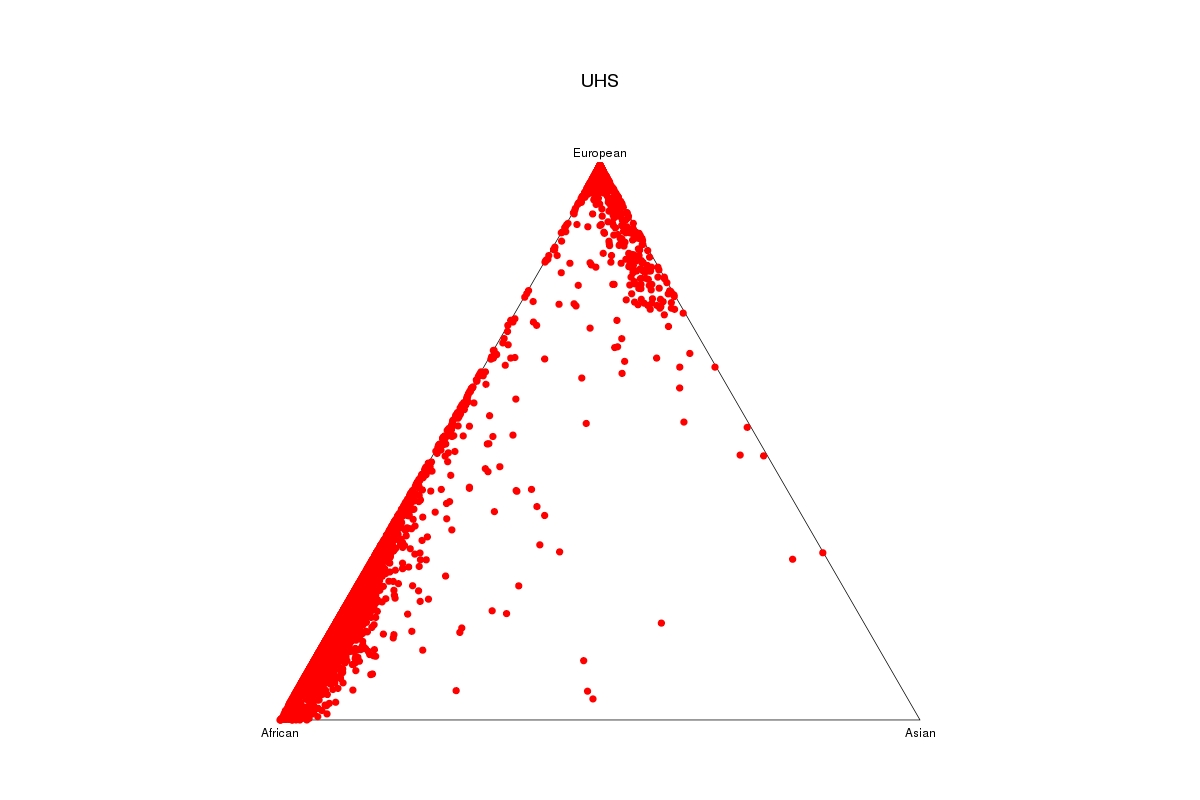### View Plots

In [ ]:
library("IRdisplay")
display_png(file="/Users/jmarks/OneDrive - Research Triangle Institute/Projects/HIV/uhs1-4/structure/1KG/afr_eas_eur_UHS.jpg", width=800, height=800)

### Thresholding
The following retainment thresholds should be implemented:

| Ancestry |Pre-Filtering Subject Count|Post-Filtering Subject Count | Retainment Thresholds     |
|----------|---------------------------|-----------------------------|---------------------------|
| EA       | 3,036                     | 3,023                       | (AFR < 25%) ∧ (EAS < 25%) |
| AA       | 4,033                     | 4,026                       | (AFR > 25%) ∧ (EAS < 25%) |
| HA       | 0                         | 13                          | (AFR < 25%) ∧ (EAS > 25%) |

```
ww afr_eas_eur.triangle_input
7070 afr_eas_eur.triangle_input
```

Seven subjects were not assigned to an ancestry group.

| ID                                   | Origninal Group   |
|--------------------------------------|---------|
| 49282@1054752684                     | uhs1_aa |
| 119705@1054753355                    | uhs1_aa |
| 232828@1054755560                    | uhs1_aa |
| 541308@1054753694                    | uhs1_aa |
| 885463@1054755444                    | uhs1_aa |
| 994455@1054755536                    | uhs1_aa |
| AS88-2170_8002023143_HHG10437_15_A01 | uhs4_aa |


```
cat ids.not.found.txt
ID
49282@1054752684
119705@1054753355
232828@1054755560
541308@1054753694
885463@1054755444
994455@1054755536
AS88-2170_8002023143_HHG10437_15_A01


grep -f structure/triangle_plots/thresholding/ids.not.found.txt uhs*/*rsid*fam
uhs1/uhs1.aa.rsid.fam:49282@1054752684 49282@1054752684 0 0 1 -9
uhs1/uhs1.aa.rsid.fam:119705@1054753355 119705@1054753355 0 0 2 -9
uhs1/uhs1.aa.rsid.fam:232828@1054755560 232828@1054755560 0 0 2 -9
uhs1/uhs1.aa.rsid.fam:541308@1054753694 541308@1054753694 0 0 2 -9
uhs1/uhs1.aa.rsid.fam:885463@1054755444 885463@1054755444 0 0 2 -9
uhs1/uhs1.aa.rsid.fam:994455@1054755536 994455@1054755536 0 0 2 -9
uhs4/uhs4.aa.rsid.fam:AS88-2170_8002023143_HHG10437_15_A01 AS88-2170_8002023143_HHG10437_15_A01 0 0 1 -9
```

In [ ]:
### get details on which subjects are reassigned ###

study=uhs
plots=${base_dir}/structure/triangle_plots/thresholding
mkdir -p $plots

cp ${base_dir}/structure/triangle_plots/afr_eas_eur.triangle_input $plots/

# AA retained
#--------------------------------------------------------------------------------
# Create triangle plot input with potential outliers filtered
eth=AA

head -1 ${base_dir}/structure/triangle_plots/afr_eas_eur.triangle_input > \
    $plots/afr_eas_eur_filtered.triangle_input

tail -n +2 $plots/afr_eas_eur.triangle_input | \
    perl -lane 'if (($F[3] > 0.25 && $F[4] < 0.25)) { print $_ }' \
    > $plots/aa_filtered

# study=vidus, for example
awk -v study="$study" -v eth="$eth" 'BEGIN{OFS="\t"} {$3=study "_" eth;print $0}' $plots/aa_filtered >> $plots/afr_eas_eur_filtered.triangle_input


# EA retained
#--------------------------------------------------------------------------------
# Create triangle plot input with potential outliers filtered
eth=EA

tail -n +2 $plots/afr_eas_eur.triangle_input |\
    perl -lane 'if (($F[3] < 0.25 && $F[4] < 0.25)) { print $_; }' \
    > $plots/ea_filtered
awk -v study="$study" -v eth="$eth" 'BEGIN{OFS="\t"} {$3=study "_" eth;print $0}' $plots/ea_filtered >> $plots/afr_eas_eur_filtered.triangle_input
#--------------------------------------------------------------------------------

# HA retained
#--------------------------------------------------------------------------------
# Create triangle plot input with potential outliers filtered
eth=HA

tail -n +2 $plots/afr_eas_eur.triangle_input |\
    perl -lane 'if (($F[3] < 0.25 && $F[4] > 0.25)) { print $_; }' \
    > $plots/ha_filtered
awk -v study="$study" -v eth="$eth" 'BEGIN{OFS="\t"} {$3=study "_" eth;print $0}' $plots/ha_filtered >> $plots/afr_eas_eur_filtered.triangle_input
#--------------------------------------------------------------------------------

# subjects not assigned to any ancestry group
comm -23 <(cut -f1 afr_eas_eur.triangle_input | sort) \
         <(cut -f1 afr_eas_eur_filtered.triangle_input | sort) > not.found.tmp
head -1 ../*xref | cut -f2 > ids.not.found.txt
awk 'NR==FNR{map[$1]=$2; next} {print substr(map[$1],1,length(map[$1])/2)}' ../*xref not.found.tmp >> ids.not.found.txt

In [ ]:
for ancestry in ea aa; do
    echo $ancestry
    for study in {uhs1,uhs2,uhs3_v1-2,uhs3_v1-3,uhs4}; do
        ww $study/$study.$ancestry.rsid.fam
    done
    echo 
done

"""
ea
1142 uhs1/uhs1.ea.rsid.fam
828 uhs2/uhs2.ea.rsid.fam
33 uhs3_v1-2/uhs3_v1-2.ea.rsid.fam
44 uhs3_v1-3/uhs3_v1-3.ea.rsid.fam
989 uhs4/uhs4.ea.rsid.fam

aa
2016 uhs1/uhs1.aa.rsid.fam
767 uhs2/uhs2.aa.rsid.fam
84 uhs3_v1-2/uhs3_v1-2.aa.rsid.fam
94 uhs3_v1-3/uhs3_v1-3.aa.rsid.fam
1072 uhs4/uhs4.aa.rsid.fam
"""

# Sandbox